## Kmeans clustering

In [1]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv("./data/iris.data.txt", header=None, names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', "flower"])

xcols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
df['flower'] = df['flower'].apply(lambda x: 0 if x == 'Iris-setosa' else (1 if x == 'Iris-versicolor' else 2))
df.head()

,sepal_length,sepal_width,petal_length,petal_width,flower
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Text(0,0.5,'Sepal Width')

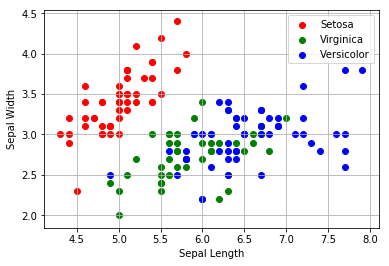

In [3]:
# sepal length vs width

iris_setosa = df[df['flower'] == 0]
iris_virginica = df[df['flower'] == 1]
iris_versicolor = df[df['flower'] == 2]

plt.scatter(iris_setosa['sepal_length'], iris_setosa['sepal_width'], color='r')
plt.scatter(iris_virginica['sepal_length'], iris_virginica['sepal_width'], color='g')
plt.scatter(iris_versicolor['sepal_length'], iris_versicolor['sepal_width'], color='b')
plt.legend(('Setosa', 'Virginica', 'Versicolor'))
plt.grid()
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")

Text(0,0.5,'Petal Width')

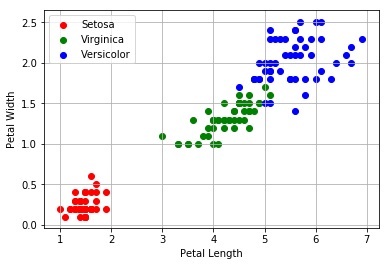

In [4]:
# petal length vs width
plt.scatter(iris_setosa['petal_length'], iris_setosa['petal_width'], color='r')
plt.scatter(iris_virginica['petal_length'], iris_virginica['petal_width'], color='g')
plt.scatter(iris_versicolor['petal_length'], iris_versicolor['petal_width'], color='b')
plt.legend(('Setosa', 'Virginica', 'Versicolor'))
plt.grid()
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")

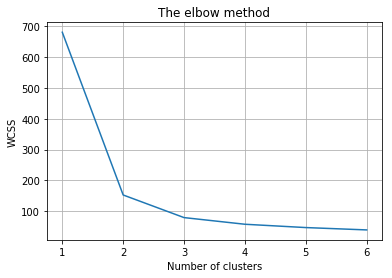

In [5]:
#Finding the optimum number of clusters for k-means classification
wcss = []

#wcss = within cluster sum of squares 

max_clusters = 7
for i in range(1, max_clusters):
    kmeans = KMeans(n_clusters = i, init = 'random')
    kmeans.fit(df[xcols])
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, max_clusters), wcss
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.grid()
plt.xticks(range(1, max_clusters), range(1, max_clusters))
plt.show()

### Choose the number of clusters(x) whose modeling will be almost same as x+1 clusters

### In this case, x=?

In [6]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10)
y_kmeans = kmeans.fit_predict(df[xcols])
print(y_kmeans)
print(kmeans.cluster_centers_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.418      1.464      0.244     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


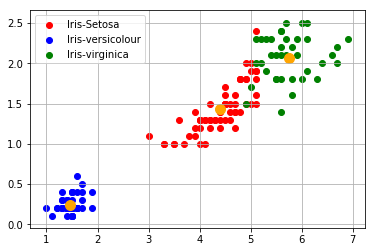

In [7]:
## visualizing sepal length and width
plt.scatter(df.values[y_kmeans == 0, 2], df.values[y_kmeans == 0, 3], c='r', label='Iris-Setosa')
plt.scatter(df.values[y_kmeans == 1, 2], df.values[y_kmeans == 1, 3], c='b', label='Iris-versicolour')
plt.scatter(df.values[y_kmeans == 2, 2], df.values[y_kmeans == 2, 3], c='g', label='Iris-virginica')
plt.legend()
plt.grid()
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:,3], s = 100, c = 'orange', label = 'Centroids')

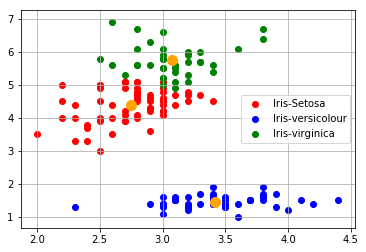

In [8]:
## visualizing sepal length and width
plt.scatter(df.values[y_kmeans == 0, 1], df.values[y_kmeans == 0, 2], c='r', label='Iris-Setosa')
plt.scatter(df.values[y_kmeans == 1, 1], df.values[y_kmeans == 1, 2], c='b', label='Iris-versicolour')
plt.scatter(df.values[y_kmeans == 2, 1], df.values[y_kmeans == 2,2], c='g', label='Iris-virginica')
plt.legend()
plt.grid()
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s = 100, c = 'orange', label = 'Centroids')

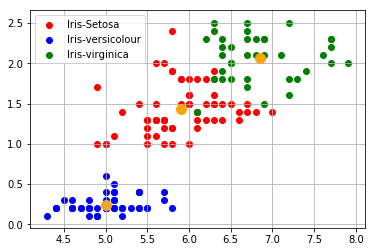

In [9]:
## visualizing sepal length and width
plt.scatter(df.values[y_kmeans == 0, 0], df.values[y_kmeans == 0, 3], c='r', label='Iris-Setosa')
plt.scatter(df.values[y_kmeans == 1, 0], df.values[y_kmeans == 1, 3], c='b', label='Iris-versicolour')
plt.scatter(df.values[y_kmeans == 2, 0], df.values[y_kmeans == 2, 3], c='g', label='Iris-virginica')
plt.legend()
plt.grid()
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,3], s = 100, c = 'orange', label = 'Centroids')

In [10]:
df_new = df[:]

In [11]:
df_new is df

False

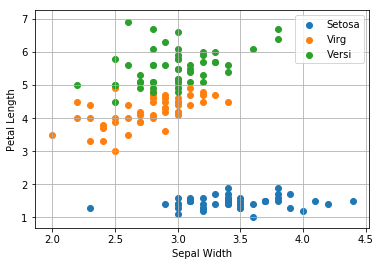

In [12]:
plt.scatter(iris_setosa['sepal_width'], iris_setosa['petal_length'], label='Setosa')
plt.scatter(iris_virginica['sepal_width'], iris_virginica['petal_length'], label='Virg')
plt.scatter(iris_versicolor['sepal_width'], iris_versicolor['petal_length'], label='Versi')
plt.grid()
plt.xlabel("Sepal Width")
plt.ylabel("Petal Length")
plt.legend()

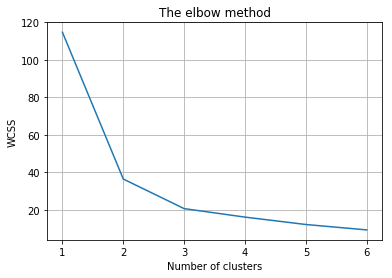

In [13]:
#Finding the optimum number of clusters for k-means classification
wcss = []

#wcss = within cluster sum of squares 

max_clusters = 7
for i in range(1, max_clusters):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(df[['sepal_width', 'petal_width']])
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, max_clusters), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.grid()
plt.xticks(range(1, max_clusters), range(1, max_clusters))
plt.show()

In [22]:
df_new[['sepal_width', 'petal_width']].to_csv('./data/clustering_exam.csv', header=['x1', 'x2'], index =False)